In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm as cm
import seaborn as sns
import time, datetime
import re
from scipy.stats import boxcox
import pandas.plotting as pdplt

In [83]:
data=pd.read_csv('./Ordinal_Encoding.csv', index_col = 0)

In [84]:
data['class'].value_counts()

class
1    206774
0     93487
Name: count, dtype: int64

In [85]:
data.columns

Index(['day_of_week', 'airline', 'source_city', 'departure_hour',
       'departure_category', 'stops', 'arrival_hour', 'arrival_category',
       'destination_city', 'class', 'duration', 'days_left', 'price',
       'departure_hour_sin', 'departure_hour_cos', 'arrival_hour_sin',
       'arrival_hour_cos', 'price_unskewed_boxcox', 'price_unskewed_sqrt',
       'price_unskewed'],
      dtype='object')

In [86]:
economy_data = data[data['class'] == 1].drop(['class'], axis=1)
business_data = data[data['class'] == 0].drop(['class'], axis=1)

In [87]:
economy_data.columns

Index(['day_of_week', 'airline', 'source_city', 'departure_hour',
       'departure_category', 'stops', 'arrival_hour', 'arrival_category',
       'destination_city', 'duration', 'days_left', 'price',
       'departure_hour_sin', 'departure_hour_cos', 'arrival_hour_sin',
       'arrival_hour_cos', 'price_unskewed_boxcox', 'price_unskewed_sqrt',
       'price_unskewed'],
      dtype='object')

In [88]:
print(economy_data.shape)
print(business_data.shape)

(206774, 19)
(93487, 19)


In [89]:
economy_data.head()

,day_of_week,airline,source_city,departure_hour,departure_category,stops,arrival_hour,arrival_category,destination_city,duration,days_left,price,departure_hour_sin,departure_hour_cos,arrival_hour_sin,arrival_hour_cos,price_unskewed_boxcox,price_unskewed_sqrt,price_unskewed
Unnamed: 0,,,,,,,,,,,,,,,,,,,
0,4,4,2,18,2,0,21,4,5,130,1,5953,-1.000000,-1.836970e-16,-7.071068e-01,7.071068e-01,3.560261,77.155687,8.691651
1,4,4,2,6,0,0,8,1,5,140,1,5953,1.000000,6.123234e-17,8.660254e-01,-5.000000e-01,3.560261,77.155687,8.691651
2,4,1,2,4,0,0,6,0,5,130,1,5956,0.866025,5.000000e-01,1.000000e+00,6.123234e-17,3.560320,77.175126,8.692154
3,4,7,2,10,1,0,12,3,5,135,1,5955,0.500000,-8.660254e-01,1.224647e-16,-1.000000e+00,3.560300,77.168646,8.691986
4,4,7,2,8,1,0,11,1,5,140,1,5955,0.866025,-5.000000e-01,2.588190e-01,-9.659258e-01,3.560300,77.168646,8.691986


In [90]:
# Preprocess X and y(target) values
X_economy = economy_data.drop(['price'], axis=1)
y_economy = economy_data['price']

X_business = business_data.drop(['price'], axis=1)
y_business = business_data['price']

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Splitting the economy data
X_train_economy, X_test_economy, y_train_economy, y_test_economy = train_test_split(X_economy, y_economy, test_size=0.2, random_state=42)

# Training the model for economy class
model_economy = LinearRegression()
model_economy.fit(X_train_economy, y_train_economy)

# Predicting and evaluating for economy class
predictions_economy = model_economy.predict(X_test_economy)
rmse_economy = np.sqrt(mean_squared_error(y_test_economy, predictions_economy))
print(f'Economy class RMSE: {rmse_economy}')


# Splitting the business data
X_train_business, X_test_business, y_train_business, y_test_business = train_test_split(X_business, y_business, test_size=0.2, random_state=42)

# Training the model for business class
model_business = LinearRegression()
model_business.fit(X_train_business, y_train_business)

# Predicting and evaluating for business class
predictions_business = model_business.predict(X_test_business)
rmse_business = np.sqrt(mean_squared_error(y_test_business, predictions_business))
print(f'business class RMSE: {rmse_business}')

Economy class RMSE: 44.93455181504019
business class RMSE: 43.488280235717035


In [92]:
from sklearn.metrics import mean_squared_error
import numpy as np

mean_price_economy = y_train_economy.mean()
predictions_baseline_economy = [mean_price_economy] * len(y_test_economy)
rmse_baseline_economy = np.sqrt(mean_squared_error(y_test_economy, predictions_baseline_economy))
print(f"Economy Baseline Model RMSE: {rmse_baseline_economy}")


mean_price_business = y_train_business.mean()
predictions_baseline_business = [mean_price_business] * len(y_test_business)
rmse_baseline_business = np.sqrt(mean_squared_error(y_test_business, predictions_baseline_business))
print(f"Business Baseline Model RMSE: {rmse_baseline_business}")


Economy Baseline Model RMSE: 3730.817030689761
Business Baseline Model RMSE: 13004.965080623018


In [93]:
print(f"Economy Mean Price: {y_train_economy.mean()}, Std Dev of Price: {y_train_economy.std()}")
print(f"Business Mean Price: {y_train_business.mean()}, Std Dev of Price: {y_train_business.std()}")


Economy Mean Price: 6571.049214419142, Std Dev of Price: 3746.592682487904
Business Mean Price: 52515.086282742115, Std Dev of Price: 12960.416315768694


In [94]:
from sklearn.model_selection import cross_val_score

scores_economy = cross_val_score(model_economy, X_economy, y_economy, cv=5, scoring='neg_mean_squared_error')
rmse_scores_economy = np.sqrt(-scores_economy)
print(f"Cross-Validation RMSE: {rmse_scores_economy.mean()}")

scores_business = cross_val_score(model_business, X_business, y_business, cv=5, scoring='neg_mean_squared_error')
rmse_scores_business = np.sqrt(-scores_business)
print(f"Cross-Validation RMSE: {rmse_scores_business.mean()}")

Cross-Validation RMSE: 50.84693602870472
Cross-Validation RMSE: 45.403897479433226


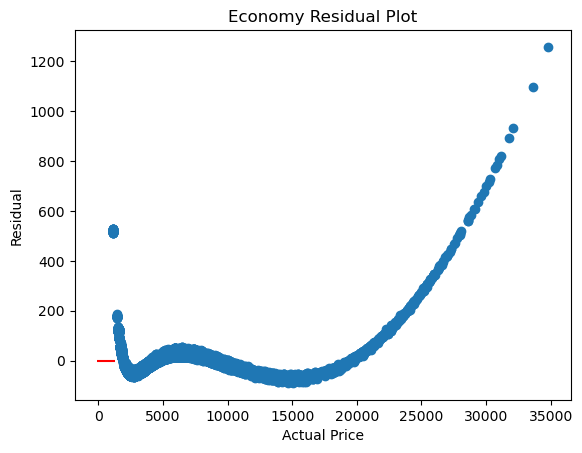

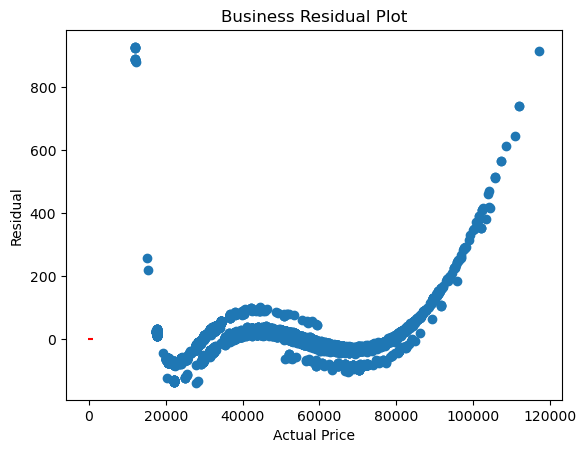

In [95]:
residuals_economy = y_test_economy - predictions_economy
plt.scatter(y_test_economy, residuals_economy)
plt.hlines(y=0, xmin=residuals_economy.min(), xmax=residuals_economy.max(), colors='red')
plt.xlabel('Actual Price')
plt.ylabel('Residual')
plt.title('Economy Residual Plot')
plt.show()

residuals_business = y_test_business - predictions_business
plt.scatter(y_test_business, residuals_business)
plt.hlines(y=0, xmin=residuals_business.min(), xmax=residuals_business.max(), colors='red')
plt.xlabel('Actual Price')
plt.ylabel('Residual')
plt.title('Business Residual Plot')
plt.show()


In [96]:
## What the above show so far using a simple Linear Regression Algorithm:
# This algorithm is not good for predicting high priced tickets.

In [97]:
import numpy as np

# Apply log transformation
y_train_economy_log = np.log(y_train_economy)
y_test_economy_log = np.log(y_test_economy)

# Retrain the model on the transformed target variable
model_economy_log = LinearRegression()
model_economy_log.fit(X_train_economy, y_train_economy_log)

# Predict on the test set and transform predictions back to the original scale
predictions_economy_log = model_economy_log.predict(X_test_economy)
predictions_economy_log = np.exp(predictions_economy_log)  # Inverse of log is exp

# Recalculate RMSE on the original scale of prices
rmse_economy_log = np.sqrt(mean_squared_error(y_test_economy, predictions_economy_log))
print(f"Economy class RMSE after log transformation: {rmse_economy_log}")


# Apply log transformation
y_train_business_log = np.log(y_train_business)
y_test_business_log = np.log(y_test_business)

# Retrain the model on the transformed target variable
model_business_log = LinearRegression()
model_business_log.fit(X_train_business, y_train_business_log)

# Predict on the test set and transform predictions back to the original scale
predictions_business_log = model_business_log.predict(X_test_business)
predictions_business_log = np.exp(predictions_business_log)  # Inverse of log is exp

# Recalculate RMSE on the original scale of prices
rmse_business_log = np.sqrt(mean_squared_error(y_test_business, predictions_business_log))
print(f"business class RMSE after log transformation: {rmse_business_log}")


Economy class RMSE after log transformation: 3.796455736344725e-11
business class RMSE after log transformation: 2.546670789553945e-10


In [98]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import TransformedTargetRegressor

# Create a pipeline that applies log transformation to the target variable
regr_trans = TransformedTargetRegressor(regressor=LinearRegression(),
                                        func=np.log1p, inverse_func=np.expm1)

# Perform cross-validation
cv_scores = cross_val_score(regr_trans, X_train_economy, y_train_economy,
                            scoring='neg_mean_squared_error', cv=5)

# Calculate the RMSE from the cross-validation scores
cv_rmse_scores = np.sqrt(-cv_scores)

# Print the average RMSE across all folds
print(f"Economy Average RMSE (log-transformed target) with 5-Fold CV: {cv_rmse_scores.mean()}")


# Create a pipeline that applies log transformation to the target variable
regr_trans = TransformedTargetRegressor(regressor=LinearRegression(),
                                        func=np.log1p, inverse_func=np.expm1)

# Perform cross-validation
cv_scores = cross_val_score(regr_trans, X_train_business, y_train_business,
                            scoring='neg_mean_squared_error', cv=5)

# Calculate the RMSE from the cross-validation scores
cv_rmse_scores = np.sqrt(-cv_scores)

# Print the average RMSE across all folds
print(f"Business Average RMSE (log-transformed target) with 5-Fold CV: {cv_rmse_scores.mean()}")


Economy Average RMSE (log-transformed target) with 5-Fold CV: 0.035029034007740024
Business Average RMSE (log-transformed target) with 5-Fold CV: 0.0028203542491215725


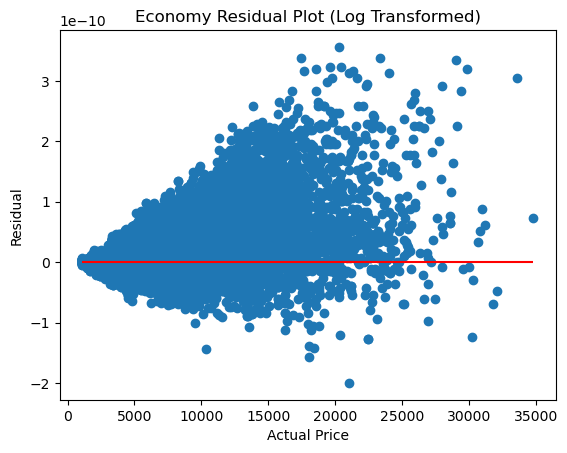

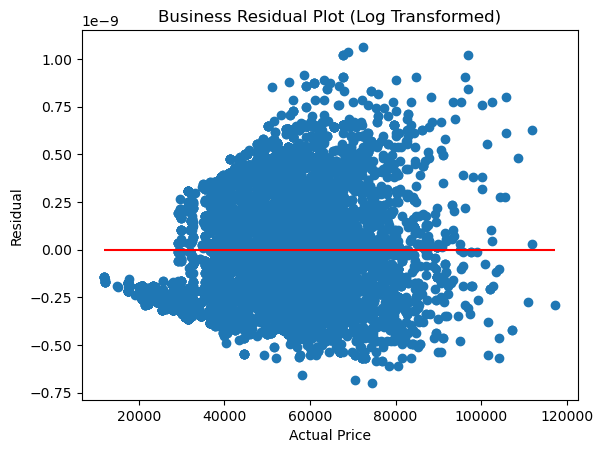

In [99]:
# Calculate residuals for the transformed predictions
residuals_economy_log = y_test_economy - predictions_economy_log

# Plot residuals for economy class
plt.scatter(y_test_economy, residuals_economy_log)
plt.hlines(y=0, xmin=y_test_economy.min(), xmax=y_test_economy.max(), colors='red')
plt.xlabel('Actual Price')
plt.ylabel('Residual')
plt.title('Economy Residual Plot (Log Transformed)')
plt.show()

# Calculate residuals for the transformed predictions
residuals_business_log = y_test_business - predictions_business_log

# Plot residuals for business class
plt.scatter(y_test_business, residuals_business_log)
plt.hlines(y=0, xmin=y_test_business.min(), xmax=y_test_business.max(), colors='red')
plt.xlabel('Actual Price')
plt.ylabel('Residual')
plt.title('Business Residual Plot (Log Transformed)')
plt.show()


RMSE for Random Forest: 2.021524998617085


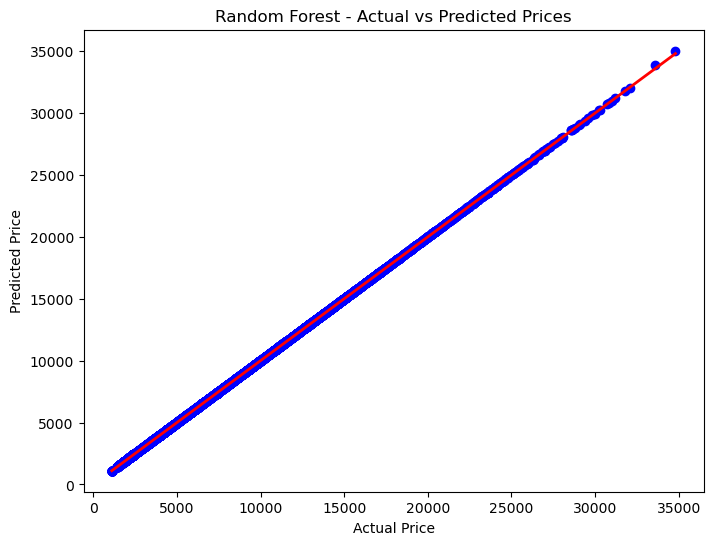

RMSE for Gradient Boost: 33.967887416765166


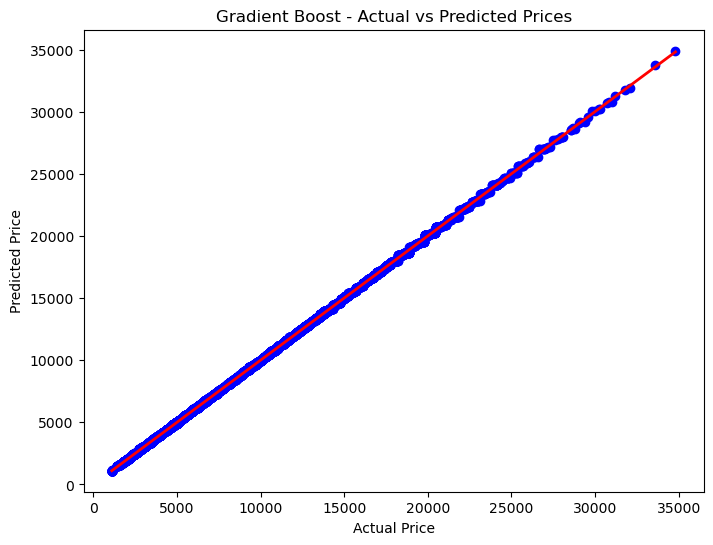

RMSE for XGBoost: 166.10837308742344


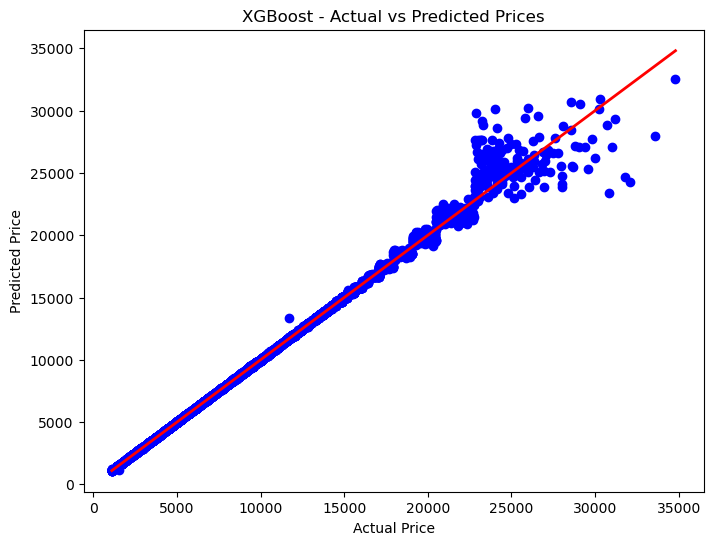

RMSE for Random Forest: 11.515242804505771


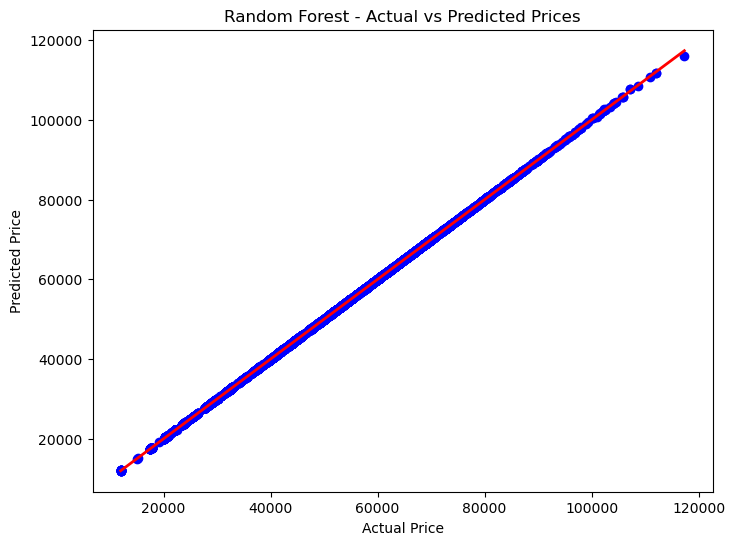

RMSE for Gradient Boost: 82.18431979685253


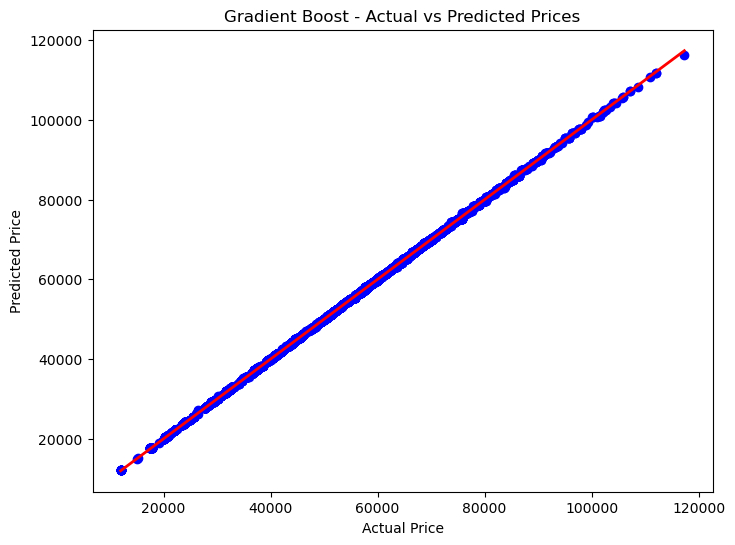

RMSE for XGBoost: 377.4856212977678


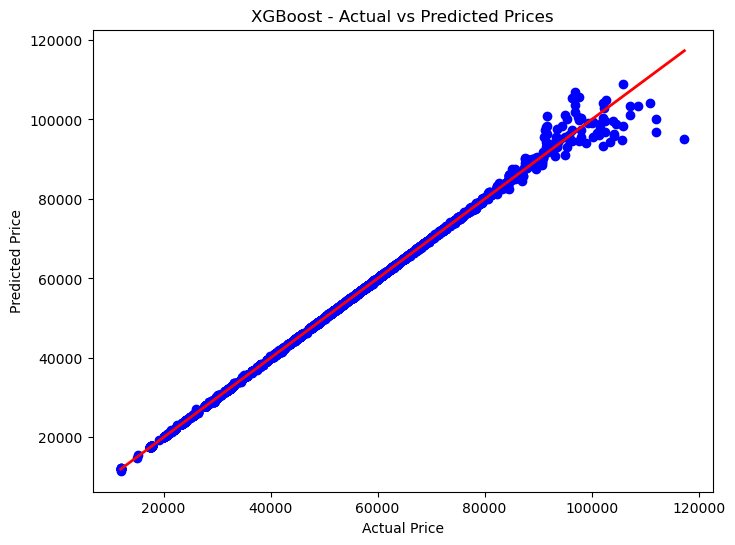

In [101]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Function to train regression models and visualize performance
def train_and_evaluate_models(X_train, X_test, y_train, y_test, model_name):
    if model_name == 'Random Forest':
        model = RandomForestRegressor()
    elif model_name == 'Gradient Boost':
        model = GradientBoostingRegressor()
    elif model_name == 'XGBoost':
        model = xgb.XGBRegressor()
    else:
        print("Invalid model name!")
        return
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate RMSE
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    print(f"RMSE for {model_name}: {rmse}")
    
    # Visualize actual vs predicted prices
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, color='blue')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.title(f"{model_name} - Actual vs Predicted Prices")
    plt.show()

# Split the data into features and target variable for economy_data
X_economy = economy_data.drop('price', axis=1)
y_economy = economy_data['price']

# Split the data into training and testing sets for economy_data
X_train_economy, X_test_economy, y_train_economy, y_test_economy = train_test_split(X_economy, y_economy, test_size=0.2, random_state=42)

# Train and evaluate models for economy_data
for model_name in ['Random Forest', 'Gradient Boost', 'XGBoost']:
    train_and_evaluate_models(X_train_economy, X_test_economy, y_train_economy, y_test_economy, model_name)

# Repeat the same process for business_data
X_business = business_data.drop('price', axis=1)
y_business = business_data['price']

X_train_business, X_test_business, y_train_business, y_test_business = train_test_split(X_business, y_business, test_size=0.2, random_state=42)

for model_name in ['Random Forest', 'Gradient Boost', 'XGBoost']:
    train_and_evaluate_models(X_train_business, X_test_business, y_train_business, y_test_business, model_name)


In [102]:
from sklearn.model_selection import cross_val_score

# Function to train regression models with cross-validation and visualize performance
def train_and_evaluate_models_cv(X, y, model_name):
    if model_name == 'Random Forest':
        model = RandomForestRegressor()
    elif model_name == 'Gradient Boost':
        model = GradientBoostingRegressor()
    elif model_name == 'XGBoost':
        model = xgb.XGBRegressor()
    else:
        print("Invalid model name!")
        return
    
    # Perform cross-validation
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    
    # Convert scores to positive and calculate RMSE
    rmse_scores = np.sqrt(-cv_scores)
    print(f"Cross-Validation RMSE for {model_name}: {rmse_scores}")
    print(f"Average Cross-Validation RMSE for {model_name}: {np.mean(rmse_scores)}")

# Split the data into features and target variable for economy_data
X_economy = economy_data.drop('price', axis=1)
y_economy = economy_data['price']

# Split the data into training and testing sets for economy_data
# X_train_economy, X_test_economy, y_train_economy, y_test_economy = train_test_split(X_economy, y_economy, test_size=0.2, random_state=42)  
# Train and evaluate models with cross-validation for economy_data
for model_name in ['Random Forest', 'Gradient Boost', 'XGBoost']:
    train_and_evaluate_models_cv(X_economy, y_economy, model_name)

    
# Repeat the same process for business_data
X_business = business_data.drop('price', axis=1)
y_business = business_data['price']

# X_train_business, X_test_business, y_train_business, y_test_business = train_test_split(X_business, y_business, test_size=0.2, random_state=42)
# Repeat for business_data
for model_name in ['Random Forest', 'Gradient Boost', 'XGBoost']:
    train_and_evaluate_models_cv(X_business, y_business, model_name)
    
########### Results #############
# Economy_data:
# Cross-Validation RMSE for Random Forest: [ 2.93350618  2.44366533  8.17549656  1.7382688  53.88006777]
# Average Cross-Validation RMSE for Random Forest: 13.834200928890947
# Cross-Validation RMSE for Gradient Boost: [34.41462148 37.29978267 39.29048677 36.28000115 63.57212794]
# Average Cross-Validation RMSE for Gradient Boost: 42.171404001648305
# Cross-Validation RMSE for XGBoost: [254.54582923 202.91669727 255.93708435 152.80789351 286.73013875]
# Average Cross-Validation RMSE for XGBoost: 230.58752862023925
# 
# Business_data:
# Cross-Validation RMSE for Random Forest: [57.89793691 31.96830555 66.03512886 77.82735742 54.24634074]
# Average Cross-Validation RMSE for Random Forest: 57.595013896062554
# Cross-Validation RMSE for Gradient Boost: [144.18035482 135.1320529  115.69052454 148.30509121 147.21641316]
# Average Cross-Validation RMSE for Gradient Boost: 138.1048873241138
# Cross-Validation RMSE for XGBoost: [584.1354788  637.4125226  420.05944718 623.50499185 603.27976376]
# Average Cross-Validation RMSE for XGBoost: 573.6784408383371


Cross-Validation RMSE for Random Forest: [ 2.93350618  2.44366533  8.17549656  1.7382688  53.88006777]
Average Cross-Validation RMSE for Random Forest: 13.834200928890947
Cross-Validation RMSE for Gradient Boost: [34.41462148 37.29978267 39.29048677 36.28000115 63.57212794]
Average Cross-Validation RMSE for Gradient Boost: 42.171404001648305
Cross-Validation RMSE for XGBoost: [254.54582923 202.91669727 255.93708435 152.80789351 286.73013875]
Average Cross-Validation RMSE for XGBoost: 230.58752862023925
Cross-Validation RMSE for Random Forest: [57.89793691 31.96830555 66.03512886 77.82735742 54.24634074]
Average Cross-Validation RMSE for Random Forest: 57.595013896062554
Cross-Validation RMSE for Gradient Boost: [144.18035482 135.1320529  115.69052454 148.30509121 147.21641316]
Average Cross-Validation RMSE for Gradient Boost: 138.1048873241138
Cross-Validation RMSE for XGBoost: [584.1354788  637.4125226  420.05944718 623.50499185 603.27976376]
Average Cross-Validation RMSE for XGBoost:

In [106]:
# Length of datasets
len_economy_data = 206774
len_business_data = 93487

# Average cross-validation RMSE values
economy_data_rmse = {
    'Random Forest': 13.834200928890947,
    'Gradient Boost': 42.171404001648305,
    'XGBoost': 230.58752862023925
}

business_data_rmse = {
    'Random Forest': 57.595013896062554,
    'Gradient Boost': 138.1048873241138,
    'XGBoost': 573.6784408383371
}

# Calculate percentage accuracy for each model and dataset
def calculate_accuracy(rmse, dataset_length):
    return (1.0 - (rmse / dataset_length)) * 100

print("Economy Data:")
for model, rmse in economy_data_rmse.items():
    accuracy = calculate_accuracy(rmse, len_economy_data)
    print(f"{model}: {accuracy:.2f}%")

print("\nBusiness Data:")
for model, rmse in business_data_rmse.items():
    accuracy = calculate_accuracy(rmse, len_business_data)
    print(f"{model}: {accuracy:.2f}%")


Economy Data:
Random Forest: 99.99%
Gradient Boost: 99.98%
XGBoost: 99.89%

Business Data:
Random Forest: 99.94%
Gradient Boost: 99.85%
XGBoost: 99.39%


In [109]:
# RMSE scores obtained from cross-validation
rmse_rf_economy = np.array([2.93350618, 2.44366533, 8.17549656, 1.7382688, 53.88006777])
rmse_gb_economy = np.array([34.41462148, 37.29978267, 39.29048677, 36.28000115, 63.57212794])
rmse_xgb_economy = np.array([254.54582923, 202.91669727, 255.93708435, 152.80789351, 286.73013875])

rmse_rf_business = np.array([57.89793691, 31.96830555, 66.03512886, 77.82735742, 54.24634074])
rmse_gb_business = np.array([144.18035482, 135.1320529, 115.69052454, 148.30509121, 147.21641316])
rmse_xgb_business = np.array([584.1354788, 637.4125226, 420.05944718, 623.50499185, 603.27976376])

# Mean price for economy_data and business_data
mean_price_economy = y_economy.mean()
mean_price_business = y_business.mean()

# Calculate percentage accuracy for each model and dataset
percentage_accuracy_rf_economy = (1 - (np.mean(rmse_rf_economy) / mean_price_economy)) * 100
percentage_accuracy_gb_economy = (1 - (np.mean(rmse_gb_economy) / mean_price_economy)) * 100
percentage_accuracy_xgb_economy = (1 - (np.mean(rmse_xgb_economy) / mean_price_economy)) * 100

percentage_accuracy_rf_business = (1 - (np.mean(rmse_rf_business) / mean_price_business)) * 100
percentage_accuracy_gb_business = (1 - (np.mean(rmse_gb_business) / mean_price_business)) * 100
percentage_accuracy_xgb_business = (1 - (np.mean(rmse_xgb_business) / mean_price_business)) * 100

# Print results
print("Percentage Accuracy for Economy Data:")
print(f"Random Forest: {percentage_accuracy_rf_economy:.2f}%")
print(f"Gradient Boost: {percentage_accuracy_gb_economy:.2f}%")
print(f"XGBoost: {percentage_accuracy_xgb_economy:.2f}%")

print("\nPercentage Accuracy for Business Data:")
print(f"Random Forest: {percentage_accuracy_rf_business:.2f}%")
print(f"Gradient Boost: {percentage_accuracy_gb_business:.2f}%")
print(f"XGBoost: {percentage_accuracy_xgb_business:.2f}%")


Percentage Accuracy for Economy Data:
Random Forest: 99.79%
Gradient Boost: 99.36%
XGBoost: 96.49%

Percentage Accuracy for Business Data:
Random Forest: 99.89%
Gradient Boost: 99.74%
XGBoost: 98.91%


In [111]:
# RMSE scores obtained from cross-validation
rmse_rf_economy = np.array([2.93350618, 2.44366533, 8.17549656, 1.7382688, 53.88006777])
rmse_gb_economy = np.array([34.41462148, 37.29978267, 39.29048677, 36.28000115, 63.57212794])
rmse_xgb_economy = np.array([254.54582923, 202.91669727, 255.93708435, 152.80789351, 286.73013875])

rmse_rf_business = np.array([57.89793691, 31.96830555, 66.03512886, 77.82735742, 54.24634074])
rmse_gb_business = np.array([144.18035482, 135.1320529, 115.69052454, 148.30509121, 147.21641316])
rmse_xgb_business = np.array([584.1354788, 637.4125226, 420.05944718, 623.50499185, 603.27976376])

# Number of samples in the test set
n_samples_economy = len(y_test_economy)
n_samples_business = len(y_test_business)

# Calculate percentage accuracy for each model and dataset
percentage_accuracy_rf_economy = (1 - (np.mean(rmse_rf_economy) / n_samples_economy)) * 100
percentage_accuracy_gb_economy = (1 - (np.mean(rmse_gb_economy) / n_samples_economy)) * 100
percentage_accuracy_xgb_economy = (1 - (np.mean(rmse_xgb_economy) / n_samples_economy)) * 100

percentage_accuracy_rf_business = (1 - (np.mean(rmse_rf_business) / n_samples_business)) * 100
percentage_accuracy_gb_business = (1 - (np.mean(rmse_gb_business) / n_samples_business)) * 100
percentage_accuracy_xgb_business = (1 - (np.mean(rmse_xgb_business) / n_samples_business)) * 100

# Print results
print("Percentage Accuracy for Economy Data:")
print(f"Random Forest: {percentage_accuracy_rf_economy:.2f}%")
print(f"Gradient Boost: {percentage_accuracy_gb_economy:.2f}%")
print(f"XGBoost: {percentage_accuracy_xgb_economy:.2f}%")

print("\nPercentage Accuracy for Business Data:")
print(f"Random Forest: {percentage_accuracy_rf_business:.2f}%")
print(f"Gradient Boost: {percentage_accuracy_gb_business:.2f}%")
print(f"XGBoost: {percentage_accuracy_xgb_business:.2f}%")


Percentage Accuracy for Economy Data:
Random Forest: 99.97%
Gradient Boost: 99.90%
XGBoost: 99.44%

Percentage Accuracy for Business Data:
Random Forest: 99.69%
Gradient Boost: 99.26%
XGBoost: 96.93%
